# Polars Vs Pandas: A Brief Overview of Common Functionality
There has been a growing amount of buzz around a new Python Data Frame Library called [**Polars**](https://pola-rs.github.io/polars/).
This library is a Data Frame Library for two languages: Python and Rust. The library is primarily written in Rust but has Python bindings and you can tell as you read through the documentation's examples. They do also outright admit this on the front page of the site.
The biggest boast from the library is how much faster it is and how performant it is with respect to memory usage. This is excellent for us Python Programmers since these are known weaknesses for Python; at least when pure Python is referenced.

In today's post, I'm going to compare using these two libraries against one another for common tasks in Data Analytics.So, let's jump right in!

In [1]:
import numpy as np
import polars as pl # proper nomenclature for importing polars
import pandas as pd

## Methods To Create Data Frames
The first most common operation is simply making a data frame.
Surprisingly often, when working on projects one will have to convert external data into a frame for processing. Whether this is from files on your own filesystem or getting scraped web data into a usable state. We'll generate some random data using a novel approach to data generation from [Real Python's Example Post](https://realpython.com/polars-python/). This uses an improved Random Number Generator built into the numpy library; thanks for showing this off Real Python! Anyways, here is their example *but* for a lot more rows of data:

In [2]:
rowSize = 5000000
rng = np.random.default_rng(seed=7)

randomdata = {
     "sqft": rng.exponential(scale=1000, size=rowSize),
     "year": rng.integers(low=1889, high=2023, size=rowSize),
     "building_type": rng.choice(["X", "Y", "Z"], size=rowSize),
 }

Both libraries have the default interface to create a data frame from a dictionary in Python:

In [3]:
polarBuildings = pl.DataFrame(randomdata)
pandaBuildings = pd.DataFrame(randomdata)

There are some real differences however in the function definitions between [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) and [Polars](https://pola-rs.github.io/polars/py-polars/html/reference/dataframe/index.html#dataframe). If you are careful about reading these pages then you likely will notice Polars refers to a **schema**. With Polars, you can elaborate what data types you expect all the columns to be instead of letting the library infer them. This is quite useful if you have pre-cleaned data or expect data structured in a specific way. Pandas does not include this ability and you will have to convert and clean up the columns after the import takes place.

If we take a look at these data frames, we can already see a marked difference in presentation:

In [4]:
polarBuildings.head()

sqft,year,building_type
f64,i64,str
707.529256,1975,"""Z"""
1025.203348,2011,"""X"""
568.548657,1970,"""X"""
895.109864,1999,"""Y"""
206.532754,2011,"""Y"""


In [5]:
pandaBuildings.head()

,sqft,year,building_type
0,707.529256,1975,Z
1,1025.203348,2011,X
2,568.548657,1970,X
3,895.109864,1999,Y
4,206.532754,2011,Y


Polars includes the data type as a subheader which is another nice default feature. You can quickly tell the inferred column types or casting failed.
Also, there is no **Index** printed for the Polars data frame as there is for the Pandas frame. This index does exist - as we'll see when we start doing subsetting - but is simply not cluttering up the output. Honestly, outside of Time Series data I find the index an annoyance to manage so this is another plus to me. Forcibly telling Pandas not to include the index when writing to CSVs sourced from a Pandas data frame is just another way you can trip over yourself while trying to do work. 
This does however raise the question how developed the *Polars* library is with respect to Time Series problems.

### Reading in Data from Files
Both Polars and Pandas has the ability to read multiple formats across the data landscape: CSV, Arrow, JSON, etc. They both have matching function calls for this as you would expect:

In [6]:
# Some Data I Know has problems:
url = 'https://media.githubusercontent.com/media/Shoklan/public-projects/main/Data/Kaggle/AllThrillerSeriesList.csv'

dfl = pl.read_csv(url)
dfd = pd.read_csv(url)

In [7]:
dfl.head(7)

,Name,Year,Tv Certificate,Duration per episode,Genre,Ratings,Actor/Actress,Votes
i64,str,str,str,str,str,f64,str,str
0,"""Andor""","""2022– ""","""TV-14 """,""" 40 min """,""" Action, Adven…",8.4,""" Diego Luna, K…",""" 82,474"""
1,"""The Peripheral…","""2022– ""","""TV-MA """,null,""" Drama, Myster…",8.0,""" Chloë Grace M…",""" 34,768"""
2,"""The Walking De…","""2010–2022""","""TV-MA """,""" 44 min """,""" Drama, Horror…",8.1,""" Andrew Lincol…",""" 988,666"""
3,"""Criminal Minds…","""2005– ""","""TV-14 """,""" 42 min """,""" Crime, Drama,…",8.1,""" Kirsten Vangs…",""" 198,262"""
4,"""Breaking Bad""","""2008–2013""","""TV-MA """,""" 49 min """,""" Crime, Drama,…",9.5,""" Bryan Cransto…",""" 1,872,005"""
5,"""Dark""","""2017–2020""","""TV-MA """,""" 60 min """,""" Crime, Drama,…",8.7,""" Louis Hofmann…",""" 384,702"""
6,"""Manifest""","""2018– ""","""TV-14 """,""" 43 min """,""" Drama, Myster…",7.1,""" Melissa Roxbu…",""" 66,158"""


In [8]:
dfd.head(7)

,Unnamed: 0,Name,Year,Tv Certificate,Duration per episode,Genre,Ratings,Actor/Actress,Votes
0,0,Andor,2022–,TV-14,40 min,"Action, Adventure, Drama",8.4,"Diego Luna, Kyle Soller, Stellan Skarsgård, G...","82,474"
1,1,The Peripheral,2022–,TV-MA,NaN,"Drama, Mystery, Sci-Fi",8.0,"Chloë Grace Moretz, Gary Carr, Jack Reynor, J...","34,768"
2,2,The Walking Dead,2010–2022,TV-MA,44 min,"Drama, Horror, Thriller",8.1,"Andrew Lincoln, Norman Reedus, Melissa McBrid...","988,666"
3,3,Criminal Minds,2005–,TV-14,42 min,"Crime, Drama, Mystery",8.1,"Kirsten Vangsness, Matthew Gray Gubler, A.J. ...","198,262"
4,4,Breaking Bad,2008–2013,TV-MA,49 min,"Crime, Drama, Thriller",9.5,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy ...","1,872,005"
5,5,Dark,2017–2020,TV-MA,60 min,"Crime, Drama, Mystery",8.7,"Louis Hofmann, Karoline Eichhorn, Lisa Vicari...","384,702"
6,6,Manifest,2018–,TV-14,43 min,"Drama, Mystery, Sci-Fi",7.1,"Melissa Roxburgh, Josh Dallas, J.R. Ramirez, ...","66,158"


### Reading Vs Scanning
Here is a topic where we will need to shortly switch our focus from comparison to only Polars: *Polars* has a Lazy Evaluation API for reading files.
If you have not come across **Lazy Evaluation** before then all this means is that work is delayed until such time that we need a result. A deeper discussion of this topic is beyond the scope of this post but by doing this the program can create a plan of action which can be optimized. If you are interested more in this topic then I recommend looking up discussions about [Directed Acyclic Graphs](https://en.wikipedia.org/wiki/Directed_acyclic_graph). For now, though this allows Polars to only read columns which are necessary for your analysis and therefore saving you time, compute and memory on Data tasks.
Please note that while the `.read_csv()` functions both work with urls, the `scan_*` functions do not work with urls. I tried and definitely can confirm it does not work!

## Data Frame Summaries
Once your data is imported, often you will want to do some quick checks making sure the data import worked and the results were sane. Both Polars and Pandas share the `.describe()` function which gives you summary statistical information about the columns:

In [9]:
polarBuildings.describe()

describe,sqft,year,building_type
str,f64,f64,str
"""count""",5e6,5e6,"""5000000"""
"""null_count""",0.0,0.0,"""0"""
"""mean""",999.647777,1955.507764,null
"""std""",999.390909,38.687521,null
"""min""",0.000078,1889.0,"""X"""
"""25%""",287.605602,1922.0,null
"""50%""",692.846786,1956.0,null
"""75%""",1386.66725,1989.0,null
"""max""",15701.555622,2022.0,"""Z"""


In [10]:
pandaBuildings.describe()

,sqft,year
count,5.000000e+06,5.000000e+06
mean,9.996478e+02,1.955508e+03
std,9.993909e+02,3.868752e+01
min,7.785435e-05,1.889000e+03
25%,2.876055e+02,1.922000e+03
50%,6.928466e+02,1.956000e+03
75%,1.386667e+03,1.989000e+03
max,1.570156e+04,2.022000e+03


While most of the information is the same, I would like to point out that the *Missing Values* has been added to this summary output. Since there is no `.info()` call for Polars, this is a proper place for that information.

## Methods to Slice a Data Frame.
Moving past basic information, another common operation is taking slices out of data frames. Pandas has two functions for this: `.loc[]` and `.iloc[]` respectively. One is supposed to use numerics while the other is supposed to use labels.
Frankly, these are not as clearly defined as they should be. For example, you can use numeric indexes for `.iloc[]` but also a boolean array per the documentation.
The problem here is that both functions allow you to use this boolean array when either one or the other should. And, all forms of slicing the rows is still a number anyways.

In [14]:
# Here is using numbers:
pandaBuildings.iloc[1:10]

,sqft,year,building_type
1,1025.203348,2011,X
2,568.548657,1970,X
3,895.109864,1999,Y
4,206.532754,2011,Y
5,3383.637351,2007,Z
6,9.753627,1948,Y
7,2809.215763,1968,Y
8,575.332756,1953,Z
9,300.534013,1928,X


In [19]:
# This is still using numbers:
pandaBuildings.loc[1:10,'year']

1     2011
2     1970
3     1999
4     2011
5     2007
6     1948
7     1968
8     1953
9     1928
10    1988
Name: year, dtype: int64

In [20]:
from itertools import repeat

# This is not really ok; binary array
pandaBuildings.iloc[list(repeat(False,rowSize - 10)) + list(repeat(True, 10))]

,sqft,year,building_type
4999990,573.107861,1940,X
4999991,255.946544,1995,X
4999992,1193.402742,1966,Y
4999993,241.536200,1981,Y
4999994,116.882680,2012,Y
4999995,813.839454,1895,Y
4999996,832.370784,1976,Y
4999997,910.292342,1940,Z
4999998,219.078462,1946,X
4999999,1464.927639,1956,Y


In [21]:
# This also works and should actually be ok
pandaBuildings.loc[list(repeat(False,rowSize - 10)) + list(repeat(True, 10))]

,sqft,year,building_type
4999990,573.107861,1940,X
4999991,255.946544,1995,X
4999992,1193.402742,1966,Y
4999993,241.536200,1981,Y
4999994,116.882680,2012,Y
4999995,813.839454,1895,Y
4999996,832.370784,1976,Y
4999997,910.292342,1940,Z
4999998,219.078462,1946,X
4999999,1464.927639,1956,Y


When working with Polars, all of this is simply a single interface which is surprisingly intelligent.

In [22]:
# just knows you want the rows
polarBuildings[1:10]

sqft,year,building_type
f64,i64,str
1025.203348,2011,"""X"""
568.548657,1970,"""X"""
895.109864,1999,"""Y"""
206.532754,2011,"""Y"""
3383.637351,2007,"""Z"""
9.753627,1948,"""Y"""
2809.215763,1968,"""Y"""
575.332756,1953,"""Z"""
300.534013,1928,"""X"""


In [23]:
# .... and, you can pass the labels as you would hope
polarBuildings[['year', 'sqft'], 1:10 ]

year,sqft
i64,f64
2011,1025.203348
1970,568.548657
1999,895.109864
2011,206.532754
2007,3383.637351
1948,9.753627
1968,2809.215763
1953,575.332756
1928,300.534013


In [24]:
# ... and, we can switch the row, column order without problems!
polarBuildings[1:10,['year', 'sqft'] ]

year,sqft
i64,f64
2011,1025.203348
1970,568.548657
1999,895.109864
2011,206.532754
2007,3383.637351
1948,9.753627
1968,2809.215763
1953,575.332756
1928,300.534013


In [73]:
# ... and preserves the selection order as well!
polarBuildings[1:10,['sqft', 'year'] ]

sqft,year
f64,i64
1025.203348,2011
568.548657,1970
895.109864,1999
206.532754,2011
3383.637351,2007
9.753627,1948
2809.215763,1968
575.332756,1953
300.534013,1928


In [31]:
# .... and we can still specify with just numbers
polarBuildings[1:10, 0:2]

sqft,year
f64,i64
1025.203348,2011
568.548657,1970
895.109864,1999
206.532754,2011
3383.637351,2007
9.753627,1948
2809.215763,1968
575.332756,1953
300.534013,1928


This is a really big win for *Polars* as I no longer longer have to bother to the juggle between `.loc[]` and `.iloc[]`.

## Broadcasting Values
An often used pattern is to create a new column and then fill it with a default value. Then, conditionally update the column based on other features in the data frame.
Doing this in Pandas is very simply and efficient.

In [32]:
pandaBuildings['turtles'] = 'Best Animal'
pandaBuildings.head()

,sqft,year,building_type,turtles
0,707.529256,1975,Z,Best Animal
1,1025.203348,2011,X,Best Animal
2,568.548657,1970,X,Best Animal
3,895.109864,1999,Y,Best Animal
4,206.532754,2011,Y,Best Animal


Doing this in Polars? Not so simple.
Sadly, we cannot simply assign a default value to a column we wish existed.

In [33]:
# This fails
try:
    polarBuildings['turtles'] = 'Best Animal'
except Exception as e:
    print(e)

DataFrame object does not support `Series` assignment by index

Use `DataFrame.with_columns`.


You can still do this with Polars but the process is strange. Basically, you need to tell Polars that this is a **literal value** and then name the column with an `.alias()` function call.

In [35]:
polarBuildings.with_columns(pl.lit('Best Animal').alias('Turtles')).head()

sqft,year,building_type,Turtles
f64,i64,str,str
707.529256,1975,"""Z""","""Best Animal"""
1025.203348,2011,"""X""","""Best Animal"""
568.548657,1970,"""X""","""Best Animal"""
895.109864,1999,"""Y""","""Best Animal"""
206.532754,2011,"""Y""","""Best Animal"""


Another problem with the Polars method is that this is not done in place. And, what I mean by that is that if you re-check the data frame the column we created does not exist.

In [36]:
# This has not been changed.
polarBuildings.head()

sqft,year,building_type
f64,i64,str
707.529256,1975,"""Z"""
1025.203348,2011,"""X"""
568.548657,1970,"""X"""
895.109864,1999,"""Y"""
206.532754,2011,"""Y"""


If we want to keep the results then we will need to assign the results back to itself. This is somewhat frustrating since it means every time you want to do a broadcast then you're making a new object.

### Filtering and Aggregation
Next on the list of common features is manipulating the data frame. The two most common forms of this are Filtering for values and aggregations such as counting or summary statistics. Polars has its own language for this: see the [documentation page](https://pola-rs.github.io/polars/user-guide/concepts/contexts/) for more information. The language looks like a simplified SQL as applied to a data frames which there is already some support for in Pandas. Using our toy data, if we wanted any year larger than 2017 then there are a few ways to do this in pandas. Personally, I'm quite a fan of the `.query()` function so I'll use that but approach this however you like.

In [37]:
pandaBuildings.query('year > 2017').head(7)

,sqft,year,building_type,turtles
14,1884.250052,2018,Z,Best Animal
36,250.345347,2018,Z,Best Animal
46,1148.245259,2022,Y,Best Animal
58,763.546235,2019,Y,Best Animal
64,26.353141,2021,X,Best Animal
65,1085.041269,2021,Z,Best Animal
89,469.285667,2022,Y,Best Animal


In *Polars*, we would use the function closest to what functionality we are after: whether `.select()` or `.filter()` - or maybe `.group_by()`:

In [39]:
# Same thing but with polars
polarBuildings.filter(pl.col('year') > 2017).head(7)

sqft,year,building_type
f64,i64,str
1884.250052,2018,"""Z"""
250.345347,2018,"""Z"""
1148.245259,2022,"""Y"""
763.546235,2019,"""Y"""
26.353141,2021,"""X"""
1085.041269,2021,"""Z"""
469.285667,2022,"""Y"""


There is a little more typing when using Polars here but this is more or less the same. One boast from the documentation is that Polars allows for parallel computations such as:

In [40]:
polarBuildings.group_by('building_type').agg([
    pl.mean('sqft'),
    pl.median('year'),
    pl.count()
])

building_type,sqft,year,count
str,f64,f64,u32
"""Z""",999.42085,1956.0,1665501
"""X""",999.225287,1956.0,1668418
"""Y""",1000.297707,1955.0,1666081


Without profiling this code - which I am considering in another future post - we cannot really know how efficient this is.
But, the readability here is solid compared to the Pandas version asking for the same information:

In [42]:
pandaBuildings.groupby('building_type').agg({
    'sqft':['mean'],
    'year':['median', 'size']})\
    .rename(columns={'size':'count'})

sqft    year         
                      mean  median    count
building_type                              
X               999.225287  1956.0  1668418
Y              1000.297707  1955.0  1666081
Z               999.420850  1956.0  1665501

## Quick Analysis of Movie Data Using Polars
Let's try using Polars to replicate an example project which I've worked on before.
Previously, I did some analysis work from a Kaggle dataset on Thriller Movies with Apache Spark; That post is [here](2022-12-24-Exploring-Tv-Data-With-Spark-Part-1.ipynb) if you are curious.

In [51]:
# Download the cleaned data from online
dataUrl = 'https://media.githubusercontent.com/media/Shoklan/public-projects/main/Data/Kaggle/AllThrillerSeriesListClean.csv'
movies = pl.read_csv(dataUrl)
movies.head()

,Name,Year,Tv Certificate,Duration per episode,Genre,Ratings,Actor/Actress,Votes
i64,str,str,str,str,str,f64,str,str
0,"""Andor""","""2022– ""","""TV-14 """,""" 40 min """,""" Action, Adven…",8.4,""" Diego Luna, K…",""" 82,474"""
1,"""The Peripheral…","""2022– ""","""TV-MA """,null,""" Drama, Myster…",8.0,""" Chloë Grace M…",""" 34,768"""
2,"""The Walking De…","""2010–2022""","""TV-MA """,""" 44 min """,""" Drama, Horror…",8.1,""" Andrew Lincol…",""" 988,666"""
3,"""Criminal Minds…","""2005– ""","""TV-14 """,""" 42 min """,""" Crime, Drama,…",8.1,""" Kirsten Vangs…",""" 198,262"""
4,"""Breaking Bad""","""2008–2013""","""TV-MA """,""" 49 min """,""" Crime, Drama,…",9.5,""" Bryan Cransto…",""" 1,872,005"""


In [52]:
# Get rid of the superfluous index column
movies.drop_in_place(name='')
movies.head()

Name,Year,Tv Certificate,Duration per episode,Genre,Ratings,Actor/Actress,Votes
str,str,str,str,str,f64,str,str
"""Andor""","""2022– ""","""TV-14 """,""" 40 min """,""" Action, Adven…",8.4,""" Diego Luna, K…",""" 82,474"""
"""The Peripheral…","""2022– ""","""TV-MA """,null,""" Drama, Myster…",8.0,""" Chloë Grace M…",""" 34,768"""
"""The Walking De…","""2010–2022""","""TV-MA """,""" 44 min """,""" Drama, Horror…",8.1,""" Andrew Lincol…",""" 988,666"""
"""Criminal Minds…","""2005– ""","""TV-14 """,""" 42 min """,""" Crime, Drama,…",8.1,""" Kirsten Vangs…",""" 198,262"""
"""Breaking Bad""","""2008–2013""","""TV-MA """,""" 49 min """,""" Crime, Drama,…",9.5,""" Bryan Cransto…",""" 1,872,005"""


In [53]:
# clean up and cast year,votes for analysis
movies = movies.with_columns(
    pl.col('Year').map_elements(lambda x: x.split('–')[0]),
    pl.col('Votes').map_elements(lambda x: x.replace(',', '').strip()).cast(pl.Float64),
)

movies = movies.rename({'Actor/Actress':'Actor'})
movies.head()

Name,Year,Tv Certificate,Duration per episode,Genre,Ratings,Actor/Actress,Votes
str,str,str,str,str,f64,str,f64
"""Andor""","""2022""","""TV-14 """,""" 40 min """,""" Action, Adven…",8.4,""" Diego Luna, K…",82474.0
"""The Peripheral…","""2022""","""TV-MA """,null,""" Drama, Myster…",8.0,""" Chloë Grace M…",34768.0
"""The Walking De…","""2010""","""TV-MA """,""" 44 min """,""" Drama, Horror…",8.1,""" Andrew Lincol…",988666.0
"""Criminal Minds…","""2005""","""TV-14 """,""" 42 min """,""" Crime, Drama,…",8.1,""" Kirsten Vangs…",198262.0
"""Breaking Bad""","""2008""","""TV-MA """,""" 49 min """,""" Crime, Drama,…",9.5,""" Bryan Cransto…",1.872005e6


In [56]:
cols = ['Name', 'Genre', 'Ratings', 'Votes']

In [68]:
medianMovieInfo = movies[cols].with_columns(
    pl.col('Genre').str.strip_chars().str.split(', '))\
    .explode('Genre').group_by("Genre").agg(
        pl.col('Ratings').median(),
        pl.col('Votes').median())\
    .sort('Ratings', descending=True)

In [69]:
meanMovieInfo = movies[cols].with_columns(
    pl.col('Genre').str.strip_chars().str.split(', ')
).explode('Genre').group_by("Genre").agg(
    pl.col('Ratings').mean(),
    pl.col('Votes').mean()
).sort('Ratings', descending=True)

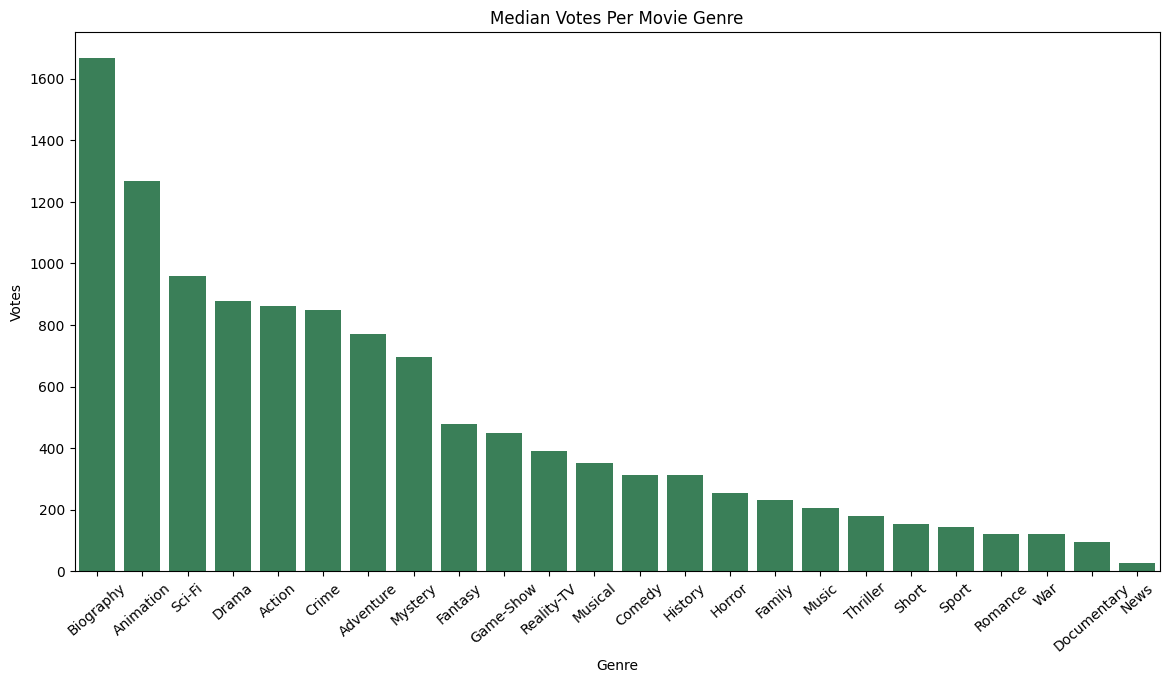

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,7);

# Wish we didn't have to convert this
dmi = medianMovieInfo.to_pandas().sort_values('Votes', ascending=False)
plt.xticks(rotation=41);
sns.barplot(dmi, x='Genre', y='Votes', color='seagreen').set_title('Median Votes Per Movie Genre');

Text(0.5, 1.0, 'Mean Votes Per Movie Genre')

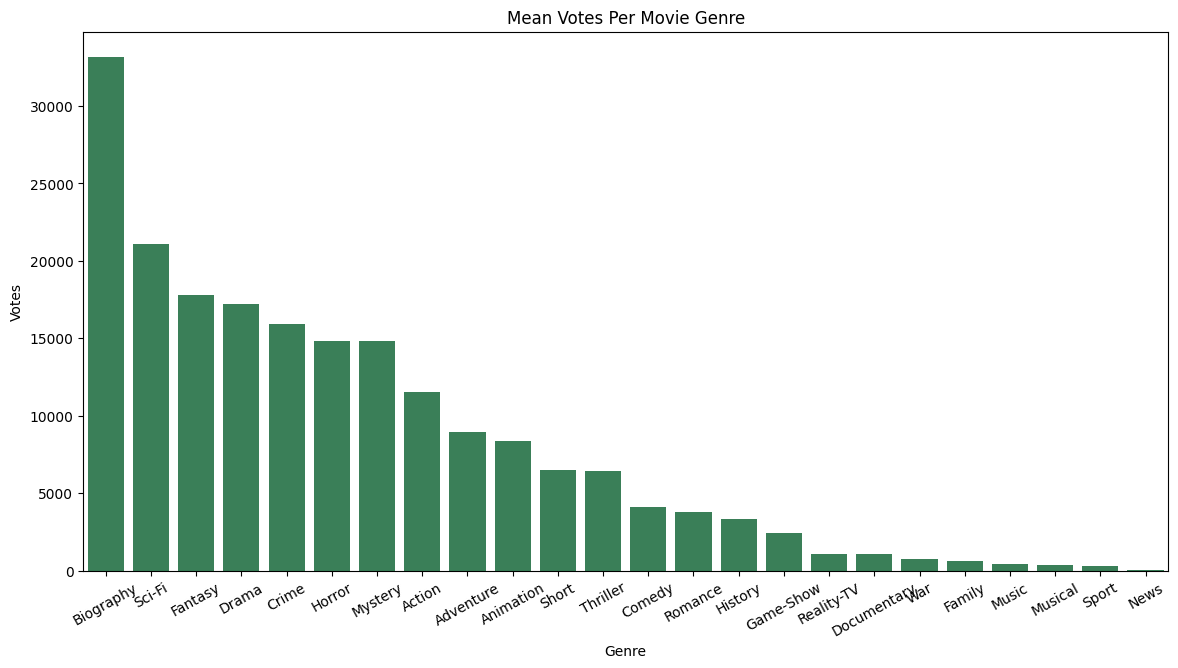

In [259]:
nmi = meanMovieInfo.to_pandas().sort_values('Votes', ascending=False)
plt.xticks(rotation=41);
sns.barplot(nmi, x='Genre', y='Votes', color='seagreen').set_title('Mean Votes Per Movie Genre');

## Conclusions
Hopefully this was as useful to you as it was for me.
I like Polars and I think I'll be using it when I know the data I am using is cleaned and ready for analysis. Otherwise, I think cleaning the data with Pandas is still the likely best first choice.